c:\Users\Tom\.virtualenvs\Iridium_Detection-dg-YW9T1\lib\site-packages\scipy\signal\_spectral_py.py:1867: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Users\Tom\AppData\Local\Temp\ipykernel_1104\4060264396.py:39: UserWarning: shading value 'jet' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(t, fftshift(f), fftshift(10*np.log10(Sxx), axes=0), shading='jet')


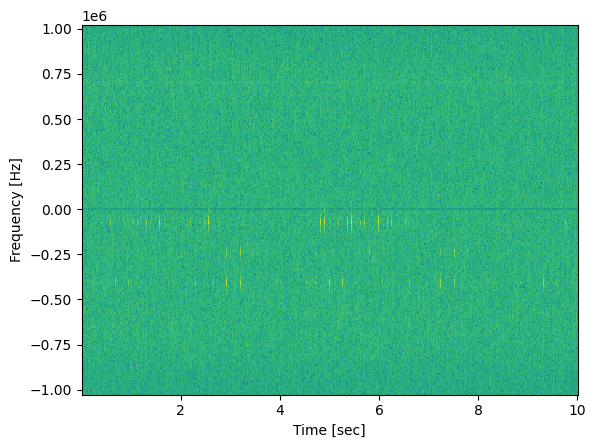

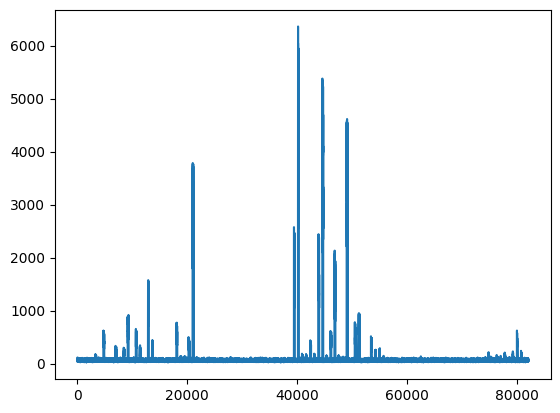

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

samples = np.fromfile('20210102_1519_1626500_0010_a.dat', dtype="uint8") # Read in file.  We have to tell it what format it is

samples = samples - 127.0
fs = 2048000  * 2 * np.pi
# Turn the interleaved I and Q samples into complex values
# the syntax "dat[0::2]" means "every 2nd value in 
# array dat starting from the 0th until the end"
dat = samples[0::2] + 1j*samples[1::2]
# Plot constellation to make sure it looks right
from scipy.signal import butter, lfilter
from scipy.signal import freqs
import datagen
import scipy

def butter_lowpass(cutOff, fs, order=5):
    nyq = 0.5 * fs
    normalCutoff = cutOff / nyq
    b, a = butter(order, normalCutoff, btype='low', analog = True)
    return b, a

def butter_lowpass_filter(data, cutOff, fs, order=4):
    b, a = butter_lowpass(cutOff, fs, order=order)
    y = lfilter(b, a, data)
    return y

import PracticalEstimators
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()
N = len(dat)
fs = 2048000
f, t, Sxx = signal.spectrogram(dat, fs)
plt.pcolormesh(t, fftshift(f), fftshift(10*np.log10(Sxx), axes=0), shading='jet')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


windowLen = 250
downconverted = datagen.convertToIQ(dat,fs=2048000,fReciever= 73150)
values = np.zeros(int(np.floor(len(dat)/windowLen)))


for i in np.arange(len(values)):


    fourier = np.fft.fft(downconverted[i*windowLen: i*windowLen + windowLen])
    # plt.plot(fourier)
    # plt.show()

    value = np.max(np.abs(fourier))
    values[i] = value

plt.plot(values)
plt.show()


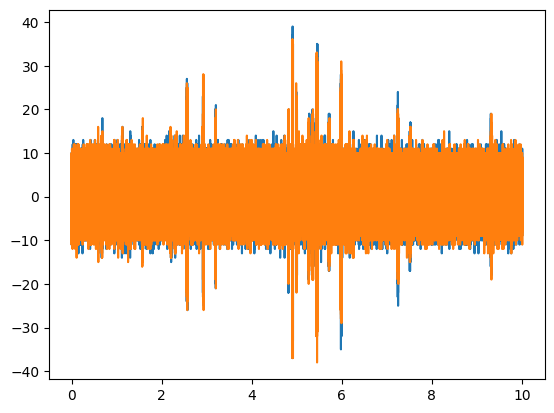

In [10]:

fs = 2048000
plt.plot(np.arange(len(dat))/fs, np.real(dat))
plt.plot(np.arange(len(dat))/fs, np.imag(dat))


C:\Users\Tom\AppData\Local\Temp\ipykernel_11908\1868096894.py:39: UserWarning: shading value 'jet' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(t, fftshift(f), fftshift(10*np.log10(Sxx), axes=0), shading='jet')


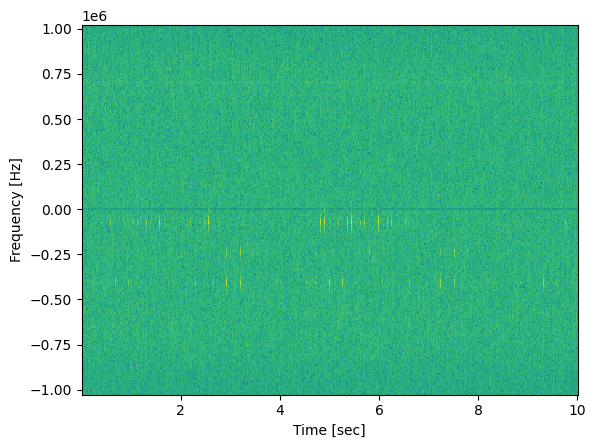

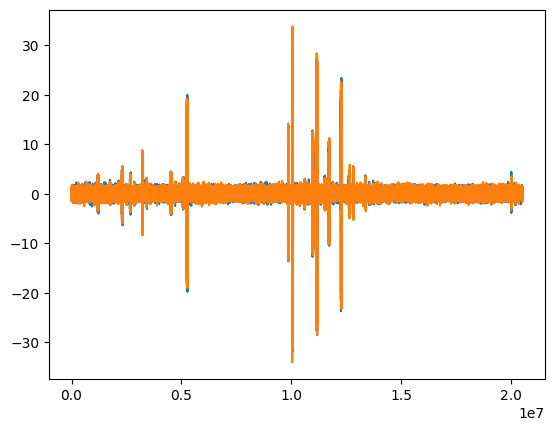

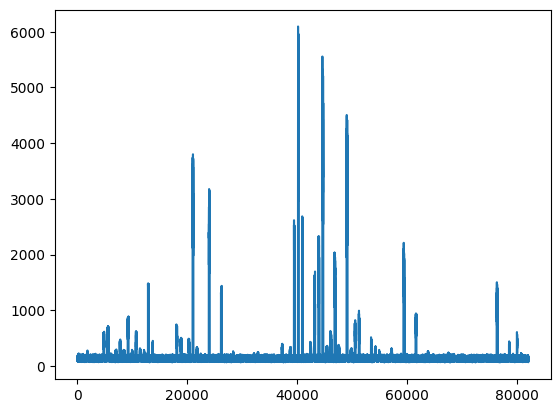

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

samples = np.fromfile('20210102_1519_1626500_0010_a.dat', dtype="uint8") # Read in file.  We have to tell it what format it is

samples = samples - 127.0
fs = 2048000  * 2 * np.pi
# Turn the interleaved I and Q samples into complex values
# the syntax "dat[0::2]" means "every 2nd value in 
# array dat starting from the 0th until the end"
dat = samples[0::2] + 1j*samples[1::2]
# Plot constellation to make sure it looks right
from scipy.signal import butter, lfilter
from scipy.signal import freqs
import datagen
import scipy

def butter_lowpass(cutOff, fs, order=5):
    nyq = 0.5 * fs
    normalCutoff = cutOff / nyq
    b, a = butter(order, normalCutoff, btype='low', analog = True)
    return b, a

def butter_lowpass_filter(data, cutOff, fs, order=4):
    b, a = butter_lowpass(cutOff, fs, order=order)
    y = lfilter(b, a, data)
    return y

import PracticalEstimators
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()
N = len(dat)
fs = 2048000
f, t, Sxx = signal.spectrogram(dat, fs)
plt.pcolormesh(t, fftshift(f), fftshift(10*np.log10(Sxx), axes=0), shading='jet')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


windowLen = 250
downconverted = datagen.convertToIQ(dat,fs=2048000,fReciever= 73150)
plt.plot(np.real(downconverted))
plt.plot(np.imag(downconverted))
plt.show()
values = np.zeros(int(np.floor(len(dat)/windowLen)))


for i in np.arange(len(values)):


    fourier = np.fft.fft(dat[i*windowLen: i*windowLen + windowLen])
    # plt.plot(fourier)
    # plt.show()

    value = np.max(np.abs(fourier))
    values[i] = value

plt.plot(values)
plt.show()


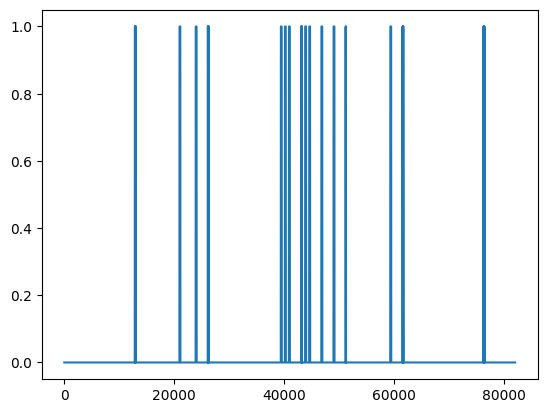

In [2]:

Thresh = 900

detections = np.zeros(int(np.floor(len(dat)/windowLen)))
for i in np.arange(len(detections)):

    if values[i] > Thresh:
        detections[i] = 1

plt.plot(detections)
plt.show()

In [3]:
mitigated = np.zeros_like(downconverted)

detectionCount = 0
for i in np.arange(len(detections)):

    if detections[i]:
        F_est = PracticalEstimators.EstimateFrequency(downconverted[i*windowLen: i*windowLen + windowLen]) 
        A_est = PracticalEstimators.EstimateAmplitude(downconverted[i*windowLen: i*windowLen + windowLen])
        # print(F_est * 2048000 / (2 * np.pi))
        # print(A_est)
        t = np.arange(len(downconverted[i*windowLen: i*windowLen + windowLen])) 
        omega = F_est
        estimated_interference = A_est* np.exp(1j * omega * t)
        # print(A_est)
        detectionCount = detectionCount + 1
        mitigated[i*windowLen: i*windowLen + windowLen] = downconverted[i*windowLen: i*windowLen + windowLen] - estimated_interference
        # plt.plot(np.real(estimated_interference))
        # plt.plot(np.imag(estimated_interference))
        # plt.show()
        # plt.plot(np.real(downconverted[i*windowLen: i*windowLen + windowLen]))
        # plt.plot(np.imag(downconverted[i*windowLen: i*windowLen + windowLen]))
        # plt.show()
        # plt.plot(np.real(mitigated[i*windowLen: i*windowLen + windowLen]))
        # plt.plot(np.imag(mitigated[i*windowLen: i*windowLen + windowLen]))
        # plt.show()
        print(np.max(np.abs(mitigated[i*windowLen: i*windowLen + windowLen])))
    else:
        mitigated[i*windowLen: i*windowLen + windowLen] = downconverted[i*windowLen: i*windowLen + windowLen]
print(detectionCount)

4.066277338393235
1.6660783080082926
2.042026937716479
1.7662830085715953
1.8929021411350058
2.100449584699759
1.843818956325102
1.790502616854086
1.665062092210334
2.2383530763316544
2.1842305707622427
1.996112276575826
2.310065474025281
2.0838589465739115
1.6970537681270037
1.9391295137865354
1.7791194408106565
1.909804435065296
2.2341571052349316
1.840306227736305
2.5026646894645235
6.537139553892298
11.555837655828126
12.179343090089617
4.766214990798579
6.679397351938848
11.767520824267931
6.501619943317455
12.26194460166331
4.175572388194132
9.041860405677587
7.608420624165332
10.336767728214152
10.444692226576192
12.15433702780009
4.012392605909773
7.587039334642286
5.966905955704376
7.677995349031727
7.623257691699865
5.3092368831526695
6.754120254843533
11.88559168880784
10.28087774592899
8.222075017501666
7.854145058704669
5.34372844293328
7.287954768706621
6.699917595498629
9.10629777126279
2.6436816846675266
9.745873281697648
6.502502278653625
6.968031588109734
12.461148337

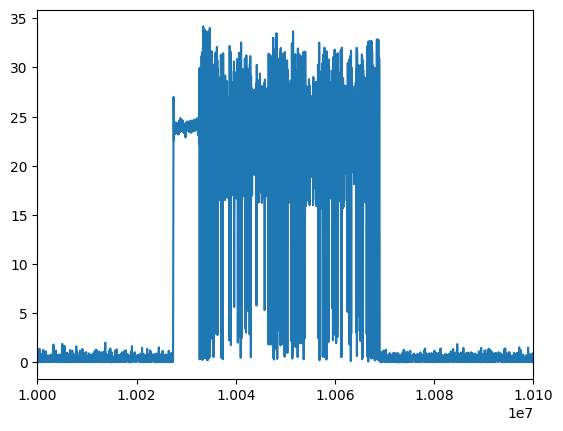

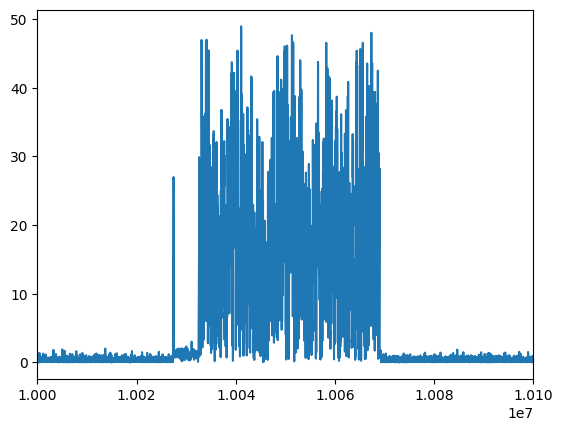

In [29]:

plt.plot(np.abs(downconverted))
# plt.plot(mitigated)
plt.xlim(10e6,10.1e6)
plt.show()


# plt.plot(downconverted)
plt.plot(np.abs(mitigated))
plt.xlim(10e6,10.1e6)

plt.show()

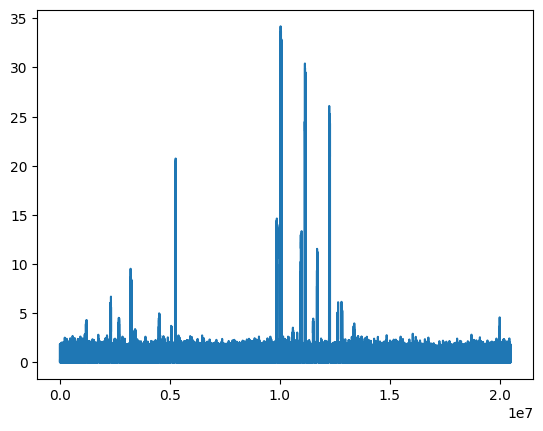

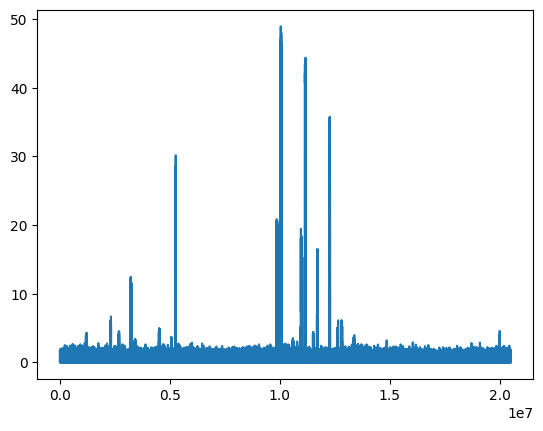

In [18]:




plt.plot(np.abs(downconverted))
# plt.xlim(10e6,10.1e6)

plt.show()


plt.plot(np.abs(mitigated))
# plt.xlim(10e6,10.1e6)

plt.show()

In [16]:
print(np.sum(np.abs(downconverted)))
print(np.sum(np.abs(mitigated)))

13248429.95339971
11954966.953973424


In [15]:
print(np.sum(np.abs(downconverted[int(10e6):int(10.1e6)])**2))
print(np.sum(np.abs(mitigated[int(10e6):int(10.1e6)])**2))

23486130.961751748
17039186.162053976


In [27]:
len(detections)

20500

c:\Users\Tom\.virtualenvs\Iridium_Detection-dg-YW9T1\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


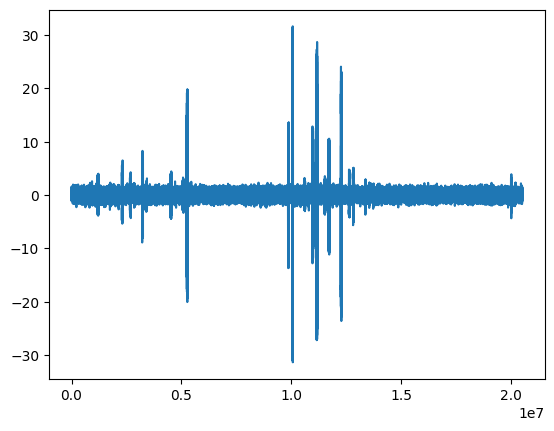

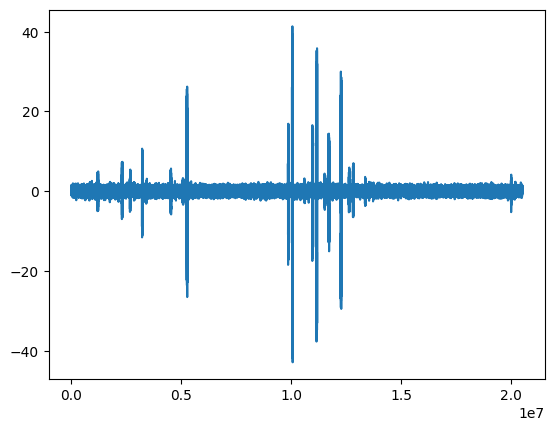

In [25]:
plt.plot(downconverted)
plt.show()
plt.plot(mitigated)
plt.show()

c:\Users\Tom\.virtualenvs\Iridium_Detection-dg-YW9T1\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


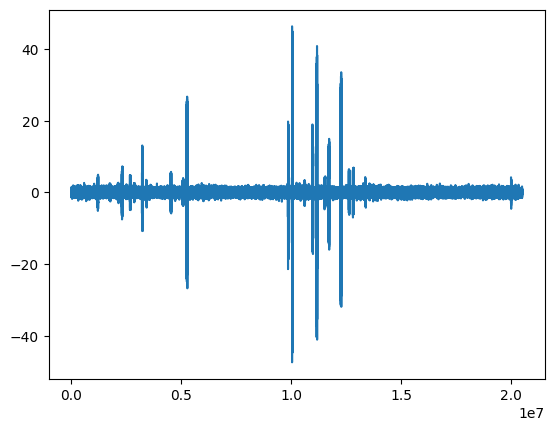

In [7]:
plt.plot(mitigated)